# Resumen Ejecutivo: Segmentación de la Calidad del Agua Subterránea Mediante Clustering No Supervisado

### Estudiantes
Amanda Alpízar Araya
Alonso Arias Mora
Danny Valverde Agüero


### Introducción y Objetivos

Este documento detalla el proceso de análisis y modelado de un conjunto de datos sobre la calidad del agua de 1,068 sitios de monitoreo de aguas subterráneas en México durante el año 2020. El **objetivo principal** fue utilizar técnicas de machine learning no supervisado (clustering) para identificar y caracterizar patrones o "perfiles" de calidad del agua existentes en los datos. La meta final no era solo agrupar los datos, sino **traducir estas agrupaciones matemáticas en perfiles descriptivos, interpretables y accionables** que pudieran informar sobre la gestión de recursos hídricos.

### Metodología de Análisis

El proyecto se ejecutó siguiendo un pipeline estructurado de ciencia de datos, que abarcó desde la limpieza inicial hasta la interpretación final del modelo:

1.  **Preparación y Limpieza de Datos:** Se realizó un exhaustivo proceso de limpieza que incluyó la corrección de tipos de datos, el manejo de formatos no estándar (ej. valores `<0.01`) y una estrategia de **imputación inteligente** para los valores ausentes.
2.  **Análisis Exploratorio de Datos (EDA):** Se investigaron las distribuciones, correlaciones y patrones espaciales de las variables para comprender la estructura fundamental de los datos y guiar las decisiones de modelado.
3.  **Ingeniería de Características:** Basado en el EDA, se seleccionaron las características más informativas, se aplicaron transformaciones no lineales (logarítmicas) para corregir el sesgo de los datos y se estandarizaron todas las variables para asegurar que contribuyeran de manera equitativa al modelo.
4.  **Modelado de Clustering:** Se utilizó el algoritmo K-Means para segmentar los datos. Se emplearon técnicas de diagnóstico (Método del Codo y Puntuación de Silueta) para determinar el número óptimo de clusters.
5.  **Interpretación y Visualización:** La fase final se centró en la caracterización de los clusters resultantes, utilizando metadatos externos para traducir los resultados numéricos en perfiles descriptivos y visualizando su distribución geográfica.

### El Rol Clave de los Metadatos (Archivo `Escalas_subterranea.csv`)

Un componente fundamental del proyecto fue el uso de un segundo archivo que contenía las **reglas de negocio** para clasificar la calidad del agua. Este archivo fue procesado y convertido en un diccionario estructurado (`quality_rules`) que funcionó como una "guía de traducción" en dos momentos críticos:

1.  **Durante la Limpieza de Datos:** Al rellenar valores numéricos faltantes, este diccionario permitió **inferir y rellenar automáticamente la etiqueta de calidad categórica correspondiente**, garantizando la consistencia lógica del conjunto de datos.
2.  **Durante la Interpretación del Modelo:** Una vez que el modelo K-Means generó los centroides (el "centro" numérico de cada cluster), este diccionario fue indispensable para **traducir los valores promedio de cada cluster a descripciones humanas comprensibles** (ej. un valor de Arsénico de 0.045 mg/L se tradujo a "No apta como FAAP"). Este paso transformó la salida matemática abstracta del modelo en insights de negocio.

### Hallazgos y Decisiones Clave

-   **Preprocesamiento Crítico:** El EDA reveló un fuerte sesgo en las distribuciones y una alta correlación entre variables de salinidad. Esto condujo a dos decisiones clave: la **aplicación de una transformación logarítmica** a las mediciones y la **eliminación de una columna redundante** (`SDT_M_mg/L`).
-   **Determinación del Número Óptimo de Clusters:** El análisis combinado del Método del Codo y la Puntuación de Silueta, junto con la observación de cómo el modelo aislaba outliers, llevó a la selección de **k=11 clusters** como la solución óptima. Esta elección maximizó la separabilidad matemática de los grupos y permitió una caracterización granular de los perfiles de agua, incluyendo la identificación de anomalías extremas.
-   **Identificación de Perfiles Geográficos:** El modelo, sin ninguna información previa sobre geografía (más allá de las coordenadas), logró identificar clusters que se correspondían fuertemente con regiones hidrogeológicas conocidas. Por ejemplo, se identificó un perfil de **"Agua Dura de Buena Calidad" casi exclusivo de la Península de Yucatán** y perfiles de **"Contaminación por Arsénico y Flúor" concentrados en el norte y noroeste del país**.

### Conclusión General

El análisis fue un éxito rotundo. Se logró segmentar el conjunto de datos en **11 perfiles de calidad del agua distintos, interpretables y geográficamente coherentes**. Estos perfiles van desde patrones comunes de agua dura o suave hasta grupos específicos definidos por contaminación de metales pesados (Arsénico, Plomo) y minerales (Flúor), e incluso se aislaron las 3 muestras más anómalas de todo el dataset.

El resultado final no es solo un modelo entrenado, sino un **sistema de clasificación validado** que puede ser utilizado para caracterizar nuevas muestras de agua y una serie de **insights accionables** que pueden guiar esfuerzos de monitoreo, tratamiento y gestión de los recursos hídricos a nivel regional.

### Sección 1: Configuración del Entorno y Carga de Datos

#### Resumen Ejecutivo de la Sección

El objetivo de esta sección inicial fue establecer el entorno de trabajo, cargar las fuentes de datos primarias y secundarias, y realizar una evaluación diagnóstica inicial de la calidad y estructura de los datos. Este paso es fundamental para definir la estrategia de preprocesamiento y análisis subsiguiente.

#### Metodología y Ejecución

1.  **Configuración del Entorno:** Se importaron las librerías estándar de Python para el análisis de datos (`pandas`, `numpy`), visualización (`matplotlib`, `seaborn`) y manipulación de texto (`re`). Adicionalmente, se configuraron los parámetros estéticos para las visualizaciones.

2.  **Carga del Conjunto de Datos Principal:** El archivo `Datos_de_calidad_del_agua_..._2020.csv` fue cargado en un DataFrame de pandas (`df`). Se especificó la codificación `latin-1` para asegurar la correcta interpretación de caracteres especiales del idioma español.

3.  **Carga de Metadatos:** El archivo de reglas de negocio, `Escalas_subterranea.csv`, fue cargado como una cadena de texto cruda (`criteria_raw_text`), dado que su formato no es tabular estándar y requiere un parseo personalizado en la siguiente sección.

4.  **Inspección Inicial:** Se ejecutaron los comandos `df.head()` y `df.info()` para obtener una vista preliminar de la estructura, los tipos de datos y la completitud del conjunto de datos principal.

#### Análisis de Resultados

La ejecución de la celda fue exitosa y la inspección inicial reveló los siguientes puntos críticos que guiarán el resto del análisis:

*   **Dimensiones del Dataset:** El conjunto de datos principal consta de **1068 registros y 57 columnas**.
*   **Identificación de Tipos de Datos Incorrectos:** El resumen de `df.info()` mostró que múltiples columnas que representan mediciones cuantitativas (ej. `AS_TOT_mg/L`) fueron cargadas con el tipo de dato `object`. Esto confirma la presencia de caracteres no numéricos que deben ser procesados.
*   **Detección de Valores Ausentes:** El conteo de valores no nulos evidenció la presencia de datos faltantes en varias columnas. Destaca la columna `SDT_mg/L`, la cual se encuentra completamente vacía, y otras con ausencias parciales que requerirán un tratamiento de imputación.

#### Conclusión de la Sección

Esta sección ha establecido exitosamente la base para el proyecto. Los datos han sido cargados y, a través de una inspección inicial, se ha generado un diagnóstico claro de los desafíos de calidad de datos que deben ser abordados: la corrección de tipos de datos, el manejo de formatos no estándar y la imputación de valores ausentes.

In [10]:
# --- Sección 1: Configuración del Entorno y Carga de Datos ---

# Importar las librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import warnings

# Ignorar advertencias (warnings) para mantener una salida limpia
warnings.filterwarnings("ignore")

# Configurar el estilo y tamaño de las gráficas para una mejor estética
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# --- 1. Cargar el conjunto de datos principal desde el archivo CSV ---
main_file_path = 'datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
try:
    df = pd.read_csv(main_file_path, encoding='latin-1')
    print(f"El conjunto de datos principal se cargó exitosamente desde: '{main_file_path}'.")
    print(f"Dimensiones del dataset: {df.shape}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: '{main_file_path}'")
    print("Por favor, actualiza la variable 'main_file_path' con la ubicación correcta del archivo.")
    df = None # Asignar None a df para prevenir errores futuros

# --- 2. Cargar los metadatos (criterios de calidad) desde su archivo CSV ---
criteria_file_path = 'datos/Escalas_subterranea.csv'
try:
    # Leemos el archivo como una única cadena de texto, ya que su estructura no es un CSV estándar
    with open(criteria_file_path, 'r', encoding='latin-1') as f:
        criteria_raw_text = f.read()
    print(f"Los metadatos de criterios se cargaron exitosamente desde: '{criteria_file_path}'.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: '{criteria_file_path}'")
    print("Por favor, actualiza la variable 'criteria_file_path' con la ubicación correcta del archivo.")
    criteria_raw_text = None

# --- 3. Mostrar información inicial del DataFrame principal ---
if df is not None:
    print("\n--- Primeras 5 filas del conjunto de datos ---")
    display(df.head())
    print("\n--- Información general y tipos de datos de las columnas ---")
    df.info()

El conjunto de datos principal se cargó exitosamente desde: 'datos/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'.
Dimensiones del dataset: (1068, 57)
Los metadatos de criterios se cargaron exitosamente desde: 'datos/Escalas_subterranea.csv'.

--- Primeras 5 filas del conjunto de datos ---


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI



--- Información general y tipos de datos de las columnas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L  

### Sección 2: Procesamiento de Metadatos y Definición de Funciones de Clasificación

#### Resumen Ejecutivo de la Sección

El objetivo fundamental de esta sección fue la ingeniería de datos aplicada a los metadatos del proyecto. Se desarrolló un proceso para transformar las reglas de negocio, provistas en el archivo `Escalas_subterranea.csv`, desde un formato de texto semi-estructurado a una estructura de datos programática y consultable. Adicionalmente, se implementó una función de clasificación que utiliza estas reglas para la evaluación automatizada de la calidad del agua.

#### Metodología y Ejecución

1.  **Mapeo de Entidades:** Para garantizar la interoperabilidad entre el conjunto de datos principal y los metadatos, se establecieron diccionarios de mapeo (`param_map`, `header_word_map`). Estos aseguran una correspondencia unívoca y robusta entre las abreviaturas de los parámetros, los nombres completos de las columnas y los descriptores textuales en los archivos.

2.  **Extracción y Estructuración de Reglas:** Se diseñó la función `parse_criteria` para procesar el contenido de los metadatos. Mediante el uso de expresiones regulares (`regex`), esta función extrae de cada línea de texto los componentes esenciales de una regla de clasificación:
    *   **Etiqueta de Calidad:** La clasificación categórica final (ej. "Apta como FAAP").
    *   **Límites Numéricos:** Los umbrales cuantitativos que definen el rango de aplicación de la etiqueta (ej. `[0.01, 0.025]`).
    
    El producto de esta función es el diccionario `quality_rules`, un objeto estructurado que sirve como base de conocimiento para el sistema.

3.  **Implementación de la Lógica de Clasificación:** Se desarrolló la función `get_quality_label_from_value`, la cual encapsula la lógica para evaluar un valor numérico de entrada contra las reglas almacenadas en `quality_rules`. Dados un parámetro y un valor, la función retorna la etiqueta de calidad categórica correspondiente.

#### Conclusión de la Sección

El resultado de esta fase es doble: se ha creado un **repositorio estructurado de las reglas de negocio (`quality_rules`)** y una **herramienta funcional (`get_quality_label_from_value`)** para su aplicación. La correcta estructuración de las reglas para el parámetro Arsénico, mostrada en la salida de la celda, valida el éxito del proceso de parseo.

Esta capacidad de clasificar programáticamente los datos numéricos es un pilar para las siguientes etapas del análisis, particularmente para la imputación consistente de datos faltantes y, de manera crucial, para la interpretación y caracterización de los clusters que se generarán en la fase de modelado.

In [11]:
# --- Sección 2: Parseo de Metadatos y Definición de Funciones de Clasificación ---

# Crear un mapeo desde los nombres cortos de los parámetros (claves) a los nombres completos de las columnas en el DataFrame principal
param_map = {
    'COLI_FEC': 'COLI_FEC_NMP/100_mL', 'SDT_salin': 'CALIDAD_SDT_salin',
    'SDT_ra': 'CALIDAD_SDT_ra', 'CR': 'CR_TOT_mg/L', 'CONDUC': 'CONDUCT_mS/cm',
    'CD': 'CD_TOT_mg/L', 'AS': 'AS_TOT_mg/L', 'ALC': 'ALC_mg/L',
    'PB': 'PB_TOT_mg/L', 'N_NO3': 'N_NO3_mg/L', 'MN': 'MN_TOT_mg/L',
    'HG': 'HG_TOT_mg/L', 'FLUO': 'FLUORUROS_mg/L', 'FE': 'FE_TOT_mg/L',
    'DUR': 'DUR_mg/L', 'SDT': 'SDT_M_mg/L'
}

# Invertir el mapa para una búsqueda fácil desde el nombre completo de la columna a la clave corta
column_to_param_map = {v: k for k, v in param_map.items()}

# Nuevo: Mapeo robusto desde la palabra clave en español en el encabezado a nuestra clave corta
header_word_map = {
    'COLIFORMES': 'COLI_FEC', 'CROMO': 'CR', 'CONDUCTIVIDAD': 'CONDUC',
    'CADMIO': 'CD', 'ARSENICO': 'AS', 'ALCALINIDAD': 'ALC', 'PLOMO': 'PB',
    'NITRATOS': 'N_NO3', 'MANGANESO': 'MN', 'MERCURIO': 'HG',
    'FLUORUROS': 'FLUO', 'HIERRO': 'FE', 'DUREZA': 'DUR'
}

def parse_criteria(criteria_string):
    """Parsea (procesa) el texto de los criterios para convertirlo en un diccionario estructurado."""
    if criteria_string is None:
        print("El texto de los criterios no está disponible. No se puede procesar.")
        return None

    lines = criteria_string.strip().split('\n')
    parsed_rules = {}
    current_param_key = None

    for line in lines:
        parts = [p.strip() for p in line.split(',', 2)]

        if parts[0].startswith('CALIDAD DEL AGUA PARA'):
            header_text = parts[0]
            current_param_key = None # Reiniciar para cada nuevo encabezado
            if "SALINIZACION" in header_text: current_param_key = "SDT_salin"
            elif "RIEGO AGRICOLA" in header_text: current_param_key = "SDT_ra"
            else:
                # Iterar a través de nuestro nuevo mapa robusto
                for word, key in header_word_map.items():
                    if word in header_text:
                        current_param_key = key
                        break # Se encontró una coincidencia, detener la búsqueda
            if current_param_key:
                parsed_rules[current_param_key] = []

        elif current_param_key and len(parts) > 1 and not parts[0].lower() == 'criterio':
            quality_label, rule_text = parts[0], parts[1]
            numbers = [float(x) for x in re.findall(r'[-+]?\d*\.\d+|\d+', rule_text)]
            if current_param_key in parsed_rules: # Asegurarse de que la clave fue inicializada
                parsed_rules[current_param_key].append({'label': quality_label, 'text': rule_text, 'numbers': numbers})
    return parsed_rules

# Procesar las reglas desde el texto cargado en la Sección 1
quality_rules = parse_criteria(criteria_raw_text)

# Verificar si el parseo fue exitoso mostrando un ejemplo
if quality_rules and quality_rules.get('AS'):
    print("Metadatos procesados exitosamente. Ejemplo para 'Arsénico (AS)':")
    print(json.dumps(quality_rules.get('AS', {}), indent=2, ensure_ascii=False))
else:
    print("No se pudieron procesar los metadatos correctamente. Revisa la lógica de parseo y el contenido del archivo.")
    print("Estado actual del parseo para 'AS':", quality_rules.get('AS', 'No encontrado'))


# --- DEFINICIÓN DE LA FUNCIÓN DE AYUDA ---
def get_quality_label_from_value(param_key, value, rules_dict):
    """Encuentra la etiqueta de calidad correcta para un valor numérico dado, basándose en las reglas procesadas."""
    if not rules_dict or param_key not in rules_dict:
        return "N/A"

    for rule in rules_dict[param_key]:
        text, nums = rule['text'].lower(), rule['numbers']
        try:
            if 'menor o igual a' in text and len(nums) == 1:
                if value <= nums[0]: return rule['label']
            elif 'menor de' in text and 'mayor o igual a' in text and len(nums) == 2:
                 if nums[0] <= value < nums[1]: return rule['label']
            elif 'menor a' in text and len(nums) == 1:
                if value < nums[0]: return rule['label']
            elif 'mayor o igual a' in text and 'menor o igual a' in text and len(nums) == 2:
                if nums[0] <= value <= nums[1]: return rule['label']
            elif 'mayor de' in text and 'menor o igual a' in text and len(nums) == 2:
                if nums[0] < value <= nums[1]: return rule['label']
            elif 'mayor de' in text and len(nums) == 1:
                if value > nums[0]: return rule['label']
            elif 'mayor o igual a' in text and len(nums) == 1:
                if value >= nums[0]: return rule['label']
        except (TypeError, IndexError):
            continue
    return "Sin regla coincidente"

Metadatos procesados exitosamente. Ejemplo para 'Arsénico (AS)':
[
  {
    "label": "Potable - Excelente",
    "text": "AS menor o igual a 0.01",
    "numbers": [
      0.01
    ]
  },
  {
    "label": "Apta como FAAP",
    "text": "AS mayor de 0.01 y menor o igual a 0.025",
    "numbers": [
      0.01,
      0.025
    ]
  },
  {
    "label": "No apta como FAAP",
    "text": "AS mayor de 0.025",
    "numbers": [
      0.025
    ]
  }
]


### Sección 3: Limpieza y Preprocesamiento de Datos

#### Resumen Ejecutivo de la Sección

El propósito de esta sección fue ejecutar un pipeline de limpieza de datos exhaustivo para transformar el conjunto de datos crudo en un formato analíticamente viable. El proceso abordó sistemáticamente los problemas de calidad de datos identificados en la fase de carga: tipos de datos incorrectos, formatos de valor no numéricos y la presencia de valores ausentes en múltiples columnas.

#### Metodología y Ejecución

1.  **Corrección de Tipos de Datos:** Se identificaron las columnas que, a pesar de representar mediciones cuantitativas, fueron cargadas con tipo `object` debido a la presencia de caracteres no numéricos (ej. `'<'`). Se aplicó una función (`clean_numeric`) para eliminar dichos caracteres y convertir estas columnas a un tipo de dato numérico (`float64`).

2.  **Manejo de Valores Ausentes:** Se implementó una estrategia de imputación en dos fases:
    *   **Imputación Inteligente (Medidas y Calidad):** Para las columnas de mediciones con ausencias parciales, se rellenaron los valores numéricos faltantes con la **mediana** de su respectiva columna (una medida robusta a outliers). De manera crucial, se utilizó la función `get_quality_label_from_value` para **inferir y rellenar la etiqueta categórica (`CALIDAD_*`) correspondiente**, garantizando la consistencia lógica entre los datos numéricos y cualitativos.
    *   **Imputación Lógica (`CONTAMINANTES`):** Se identificó que los valores nulos en la columna `CONTAMINANTES` indicaban la ausencia de problemas de calidad. Por lo tanto, estos 434 valores faltantes fueron explícitamente rellenados con la etiqueta **"Sin Contaminantes"**, completando así la columna.
    *   **Eliminación de Columnas:** La columna `SDT_mg/L` fue eliminada por carecer completamente de datos (100% de valores nulos).

#### Conclusión de la Sección

El proceso fue exitoso, como lo demuestra el informe final de `df.info()`, que confirma la ausencia total de valores nulos en el DataFrame. El resultado es un único DataFrame, `df_cleaned`, que está **completo, limpio y lógicamente consistente**. Todas las columnas numéricas tienen el tipo de dato correcto y todas las celdas han sido rellenadas de manera informada.

Este DataFrame `df_cleaned` constituye la base sólida y confiable sobre la cual se construirán todos los análisis visuales, estadísticos y de modelado en las secciones posteriores.

In [12]:
# --- Sección 3: Limpieza y Preprocesamiento de Datos ---

if df is not None:
    df_cleaned = df.copy()

    # Definir qué columnas deberían ser mediciones numéricas
    numerical_cols = [
        'LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_mg/L',
        'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
        'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
        'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'
    ]

    # Función para convertir columnas de tipo 'object' con símbolos '<' a numéricas
    def clean_numeric(value):
        if isinstance(value, str):
            value = value.replace('<', '').strip()
        return pd.to_numeric(value, errors='coerce')

    # Aplicar la función de limpieza a todas las columnas numéricas potenciales
    for col in numerical_cols:
        if col in df_cleaned.columns and df_cleaned[col].dtype == 'object':
            df_cleaned[col] = df_cleaned[col].apply(clean_numeric)

    # --- 1. Manejo de Valores Faltantes (Excepto 'CONTAMINANTES') ---
    print("--- Análisis de Valores Faltantes (Antes de la Imputación) ---")
    missing = df_cleaned.isnull().sum()
    missing = missing[missing > 0]
    print(missing.sort_values(ascending=False))

    # Eliminar la columna SDT_mg/L ya que está 100% vacía
    if 'SDT_mg/L' in df_cleaned.columns:
        df_cleaned = df_cleaned.drop(columns=['SDT_mg/L'])
        numerical_cols.remove('SDT_mg/L')

    # Imputar (rellenar) las columnas numéricas y sus correspondientes columnas categóricas
    print("\n--- Imputando Valores Faltantes (Medidas y Calidad) ---")
    for col in numerical_cols:
        if df_cleaned[col].isnull().sum() > 0:
            # Obtener los índices de las filas con valores faltantes ANTES de rellenar
            missing_indices = df_cleaned[df_cleaned[col].isnull()].index

            # Calcular la mediana y rellenar la columna numérica
            median_val = df_cleaned[col].median()
            df_cleaned[col] = df_cleaned[col].fillna(median_val)
            print(f"Se rellenaron {len(missing_indices)} valores faltantes en '{col}' con la mediana: {median_val}")

            # Rellenar la(s) columna(s) categórica(s) correspondiente(s)
            if col == 'SDT_M_mg/L':
                quality_cols_info = [('SDT_ra', 'CALIDAD_SDT_ra'), ('SDT_salin', 'CALIDAD_SDT_salin')]
            else:
                param_key = column_to_param_map.get(col)
                if param_key:
                    quality_cols_info = [(param_key, f"CALIDAD_{param_key}")]
                else:
                    quality_cols_info = []

            for param_key, quality_col_name in quality_cols_info:
                if quality_col_name in df_cleaned.columns:
                    for idx in missing_indices:
                        imputed_value = df_cleaned.loc[idx, col]
                        label = get_quality_label_from_value(param_key, imputed_value, quality_rules)
                        df_cleaned.loc[idx, quality_col_name] = label
                    print(f"  -> Se infirieron y rellenaron las etiquetas para '{quality_col_name}'.")

    # --- 2. Manejo de Valores Faltantes en la Columna 'CONTAMINANTES' ---
    print("\n--- Imputando Valores Faltantes (Columna 'CONTAMINANTES') ---")
    missing_before = df_cleaned['CONTAMINANTES'].isnull().sum()
    print(f"Valores faltantes en 'CONTAMINANTES' antes del relleno: {missing_before}")

    if missing_before > 0:
        df_cleaned['CONTAMINANTES'].fillna('Sin Contaminantes', inplace=True)
        missing_after = df_cleaned['CONTAMINANTES'].isnull().sum()
        print(f"Se rellenaron {missing_before} valores.")
        print(f"Valores faltantes en 'CONTAMINANTES' después del relleno: {missing_after}")
    else:
        print("La columna 'CONTAMINANTES' no tiene valores faltantes.")


    # --- 3. Verificación Final ---
    print("\n--- Tipos de Datos e Información Final (Después de la Imputación Completa) ---")
    total_missing_after_imputation = df_cleaned.isnull().sum().sum()

    if total_missing_after_imputation == 0:
        print("¡Éxito! El DataFrame ya no contiene ningún valor faltante.")
    else:
        print(f"Advertencia: Aún quedan {total_missing_after_imputation} valores faltantes en el dataset.")

    df_cleaned.info()

--- Análisis de Valores Faltantes (Antes de la Imputación) ---
SDT_mg/L             1068
CONTAMINANTES         434
CONDUCT_mS/cm           6
CALIDAD_CONDUC          6
ALC_mg/L                4
CALIDAD_ALC             4
SDT_M_mg/L              2
CALIDAD_SDT_ra          2
CALIDAD_SDT_salin       2
DUR_mg/L                1
CALIDAD_DUR             1
N_NO3_mg/L              1
CALIDAD_N_NO3           1
dtype: int64

--- Imputando Valores Faltantes (Medidas y Calidad) ---
Se rellenaron 4 valores faltantes en 'ALC_mg/L' con la mediana: 215.5275
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_ALC'.
Se rellenaron 6 valores faltantes en 'CONDUCT_mS/cm' con la mediana: 815.0
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_CONDUC'.
Se rellenaron 2 valores faltantes en 'SDT_M_mg/L' con la mediana: 550.4
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_SDT_ra'.
  -> Se infirieron y rellenaron las etiquetas para 'CALIDAD_SDT_salin'.
Se rellenaron 1 valores faltantes

### Sección 4.0: Análisis Profundo de Cardinalidad

#### Resumen Ejecutivo de la Sección

En esta sección, se realizó un análisis exhaustivo de la cardinalidad para entender la complejidad de las variables categóricas. El objetivo fue cuantificar con precisión el número de valores únicos para cada característica, con el fin de informar las decisiones de ingeniería de características, prestando especial atención a las variables de alta granularidad como `ACUIFERO` y la naturaleza multi-etiqueta de `CONTAMINANTES`.

#### Metodología y Ejecución

La metodología se estructuró en dos fases analíticas:

1.  **Análisis Específico de `CONTAMINANTES`:** Se procesó primero la columna `CONTAMINANTES` para desglosar sus valores multi-etiqueta, calculando el número real de tipos de contaminantes únicos.
2.  **Análisis General Integrado:** Posteriormente, se calculó la cardinalidad para todas las variables categóricas, utilizando el recuento corregido y preciso para `CONTAMINANTES`. Los resultados se visualizaron mediante un gráfico de barras para una comparación directa y un gráfico de pastel para mostrar la proporción de variables en cada nivel de cardinalidad.

#### Análisis de Resultados

1.  **Identificación de Variables de Alta Cardinalidad:**
    *   El gráfico de barras general fue clave para identificar las variables problemáticas. Se confirmó que `CLAVE` (1068) y `SITIO` (1066) son identificadores únicos.
    *   De manera crucial, se reveló que las variables geográficas categóricas, **`MUNICIPIO` (452) y `ACUIFERO` (273)**, poseen una cardinalidad extremadamente alta. Esto las hace inviables para ser usadas directamente en un modelo de clustering mediante técnicas como one-hot encoding, ya que crearían un espacio de características demasiado grande y disperso.
    *   **Implicación Crítica:** Este hallazgo proporciona una justificación sólida y fundamental para la estrategia de **utilizar las coordenadas `LONGITUD` y `LATITUD` como los principales descriptores espaciales**, en lugar de estas categorías tan granulares.

2.  **Análisis Detallado de `CONTAMINANTES`:**
    *   Aunque el conteo inicial de combinaciones era de 127, el análisis profundo reveló que el número real de **tipos de contaminantes únicos es de solo 17**.
    *   La visualización de frecuencias demostró que los problemas de calidad más recurrentes son la **Dureza Total (`DT`)**, los **Fluoruros (`FLUO`)**, el **Arsénico (`AS`)** y el **Hierro (`FE`)**.

3.  **Variables de Baja y Media Cardinalidad:**
    *   La mayoría de las variables de calidad (`CALIDAD_*`) y cumplimiento (`CUMPLE_CON_*`) mostraron una **baja cardinalidad (2-5 valores)**, confirmando que son manejables y reflejan un número limitado de categorías de clasificación.

#### Conclusión de la Sección

Este análisis de cardinalidad ha sido un pilar para la estrategia de modelado. Ha validado la decisión de **excluir los identificadores y las características geográficas de alta cardinalidad como `ACUIFERO` y `MUNICIPIO`**, reforzando la elección de las coordenadas como una representación espacial más eficiente. Además, el desglose de la columna `CONTAMINANTES` ha proporcionado insights valiosos sobre los desafíos de calidad del agua más prevalentes en el conjunto de datos.


--- Análisis Detallado de la Columna 'CONTAMINANTES' ---


--- Análisis General de Cardinalidad ---


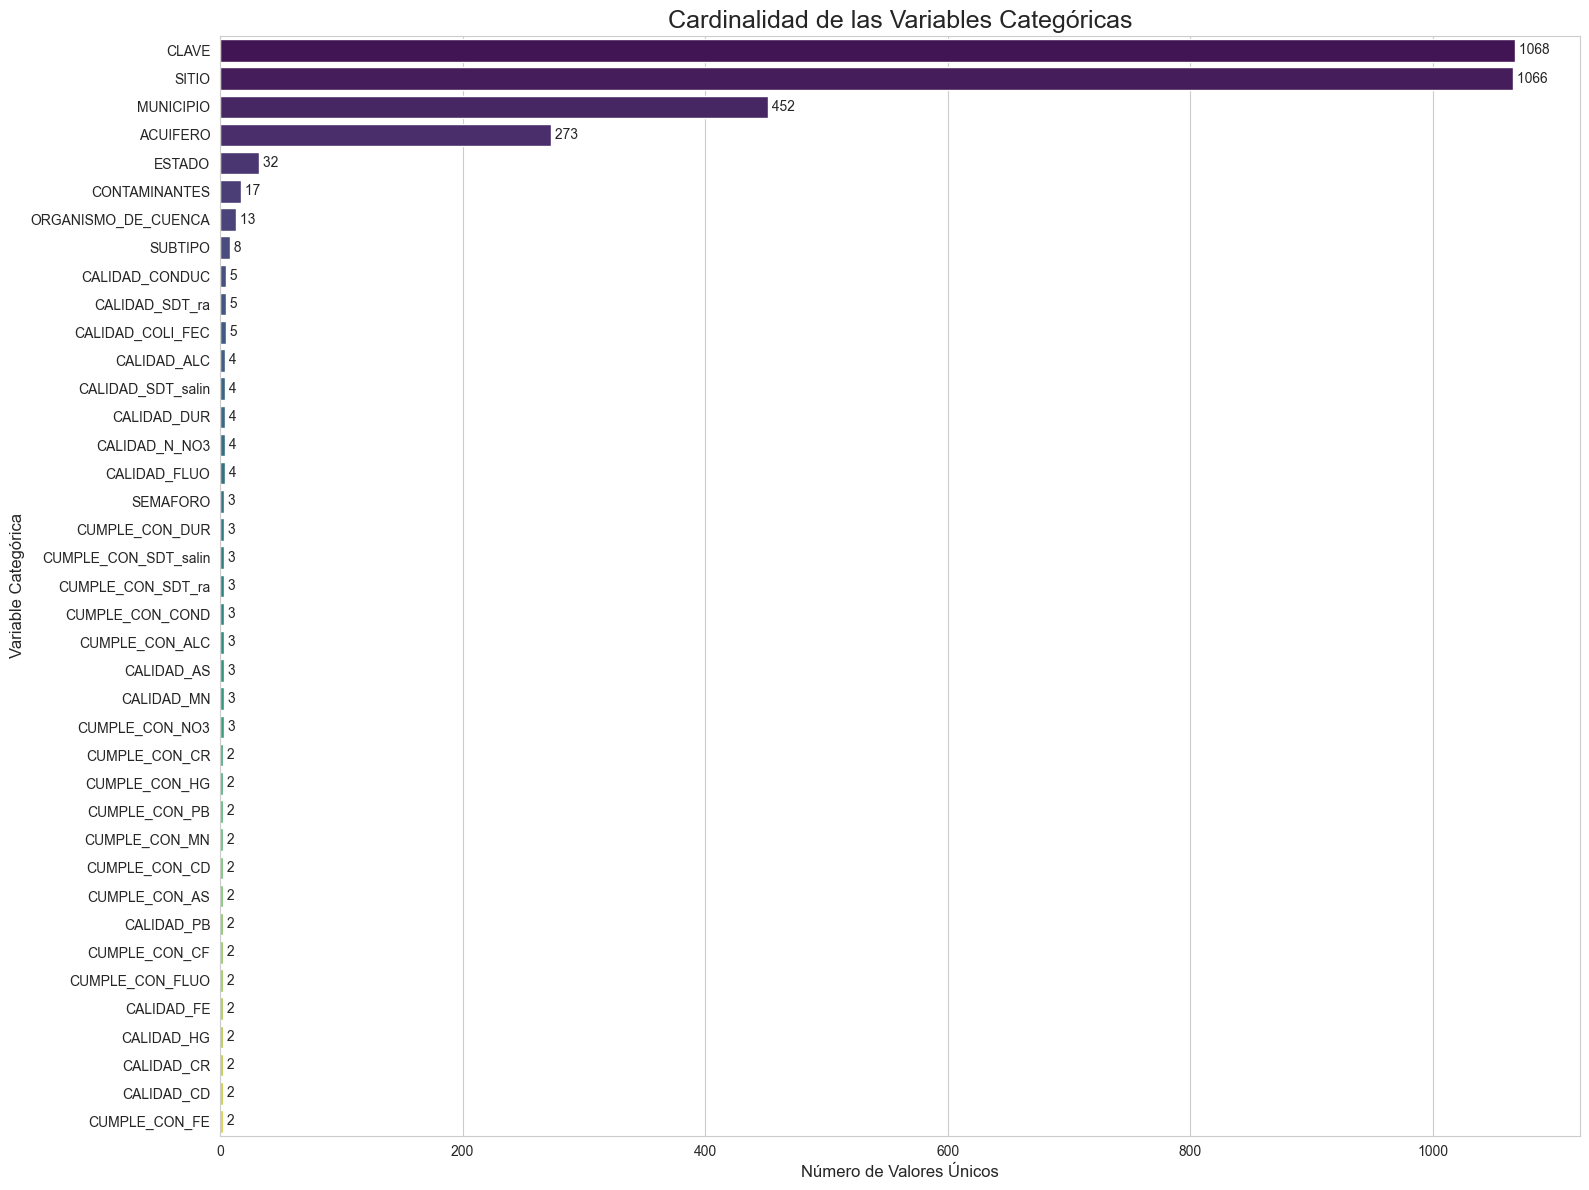

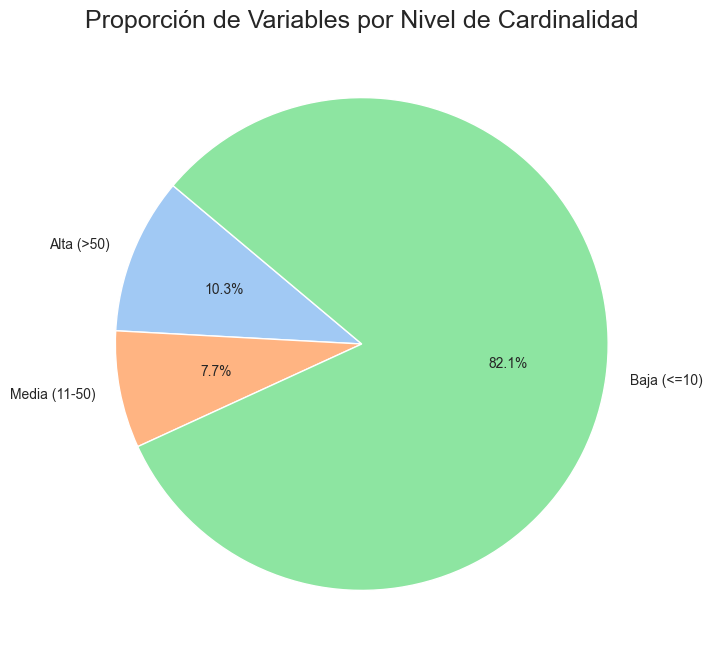


Número de etiquetas únicas (incluyendo 'Sin Contaminantes'): 17

--- Frecuencia de Cada Contaminante Individual (y Muestras Limpias) ---


,Contaminante,Frecuencia
0,Sin Contaminantes,434
1,Dureza Total,226
2,Fluoruros,192
3,Hierro,136
4,Arsénico,127
5,Conductividad,123
6,Manganeso,86
7,Nitratos,82
8,Sólidos Disueltos (Riego),71
9,Sólidos Disueltos (Salinidad),71


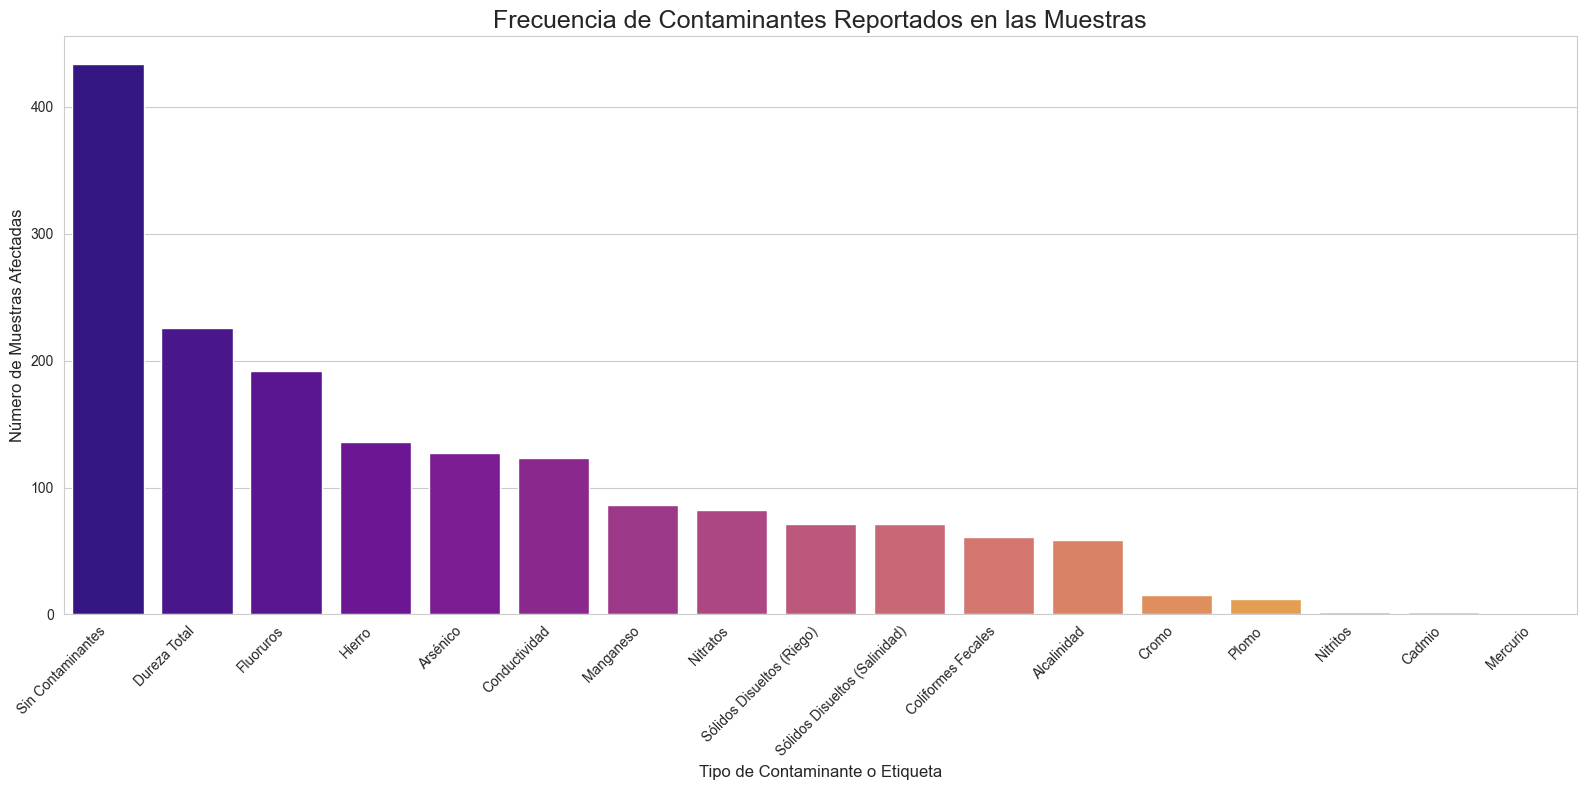


--- Resumen Detallado por Nivel de Cardinalidad ---

[+] Variables de ALTA CARDINALIDAD (> 50 valores únicos):
- CLAVE (Únicos: 1068)
- SITIO (Únicos: 1066)
- MUNICIPIO (Únicos: 452)
- ACUIFERO (Únicos: 273)

[~] Variables de CARDINALIDAD MEDIA (11-50 valores únicos):
- ESTADO (Únicos: 32)
- CONTAMINANTES (Únicos: 17)
- ORGANISMO_DE_CUENCA (Únicos: 13)

[-] Variables de BAJA CARDINALIDAD (<= 10 valores únicos):
- SUBTIPO (Únicos: 8)
- CALIDAD_CONDUC (Únicos: 5)
- CALIDAD_SDT_ra (Únicos: 5)
- CALIDAD_COLI_FEC (Únicos: 5)
- CALIDAD_ALC (Únicos: 4)
- CALIDAD_SDT_salin (Únicos: 4)
- CALIDAD_DUR (Únicos: 4)
- CALIDAD_N_NO3 (Únicos: 4)
- CALIDAD_FLUO (Únicos: 4)
- SEMAFORO (Únicos: 3)
- CUMPLE_CON_DUR (Únicos: 3)
- CUMPLE_CON_SDT_salin (Únicos: 3)
- CUMPLE_CON_SDT_ra (Únicos: 3)
- CUMPLE_CON_COND (Únicos: 3)
- CUMPLE_CON_ALC (Únicos: 3)
- CALIDAD_AS (Únicos: 3)
- CALIDAD_MN (Únicos: 3)
- CUMPLE_CON_NO3 (Únicos: 3)
- CUMPLE_CON_CR (Únicos: 2)
- CUMPLE_CON_HG (Únicos: 2)
- CUMPLE_CON_PB (Únic

In [13]:
# --- Sección 4.0: Análisis Profundo de Cardinalidad con Visualizaciones ---

if 'df_cleaned' in locals():
    # --- Parte 1: Análisis Detallado de la Columna 'CONTAMINANTES' ---
    print("\n--- Análisis Detallado de la Columna 'CONTAMINANTES' ---")

    # Diccionario para mapear abreviaturas a nombres completos y amigables
    contaminant_name_map = {
        'Sin Contaminantes': 'Sin Contaminantes', 'DT': 'Dureza Total', 'FLUO': 'Fluoruros',
        'AS': 'Arsénico', 'FE': 'Hierro', 'CF': 'Coliformes Fecales', 'NO3': 'Nitratos',
        'CONDUC': 'Conductividad', 'MN': 'Manganeso', 'SDT_ra': 'Sólidos Disueltos (Riego)',
        'SDT_salin': 'Sólidos Disueltos (Salinidad)', 'CR': 'Cromo', 'PB': 'Plomo',
        'NI': 'Nitritos', 'CD': 'Cadmio', 'HG': 'Mercurio', 'ALC': 'Alcalinidad'
    }

    # Procesar la Serie para extraer todos los contaminantes individuales
    all_contaminants_full = df_cleaned['CONTAMINANTES'].str.split(',').explode().str.strip().replace('', np.nan).dropna()
    contaminant_counts_full = all_contaminants_full.value_counts()

    # Crear el DataFrame para la tabla y mapear a nombres amigables
    contaminant_counts_full_df = contaminant_counts_full.reset_index()
    contaminant_counts_full_df.columns = ['Etiqueta_Corta', 'Frecuencia']
    contaminant_counts_full_df['Contaminante'] = contaminant_counts_full_df['Etiqueta_Corta'].map(contaminant_name_map).fillna(contaminant_counts_full_df['Etiqueta_Corta'])

    # --- Parte 2: Análisis General de Cardinalidad ---
    print("\n\n--- Análisis General de Cardinalidad ---")

    categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
    cardinality_data = []
    for col in categorical_cols:
        if col == 'CONTAMINANTES':
            # Usar el conteo real de tipos de contaminantes
            num_unique = len(contaminant_counts_full)
        else:
            num_unique = df_cleaned[col].nunique()
        cardinality_data.append({'Columna': col, 'Valores Únicos (Cardinalidad)': num_unique})

    cardinality_df = pd.DataFrame(cardinality_data).sort_values(by='Valores Únicos (Cardinalidad)', ascending=False)

    # Visualización de Cardinalidad General
    plt.figure(figsize=(16, 12))
    sns.barplot(x='Valores Únicos (Cardinalidad)', y='Columna', data=cardinality_df, palette='viridis')
    plt.title('Cardinalidad de las Variables Categóricas', fontsize=18)
    plt.xlabel('Número de Valores Únicos', fontsize=12)
    plt.ylabel('Variable Categórica', fontsize=12)
    for index, value in enumerate(cardinality_df['Valores Únicos (Cardinalidad)']):
        plt.text(value, index, f' {value}', va='center')
    plt.tight_layout()
    plt.show()

    # Agrupar por nivel de cardinalidad
    low_cardinality_threshold = 10
    high_cardinality_threshold = 50
    low_card_count = (cardinality_df['Valores Únicos (Cardinalidad)'] <= low_cardinality_threshold).sum()
    high_card_count = (cardinality_df['Valores Únicos (Cardinalidad)'] > high_cardinality_threshold).sum()
    medium_card_count = len(cardinality_df) - low_card_count - high_card_count

    cardinality_summary = {'Nivel': ['Alta (>50)', 'Media (11-50)', 'Baja (<=10)'], 'Conteo': [high_card_count, medium_card_count, low_card_count]}
    plt.figure(figsize=(10, 8))
    plt.pie(cardinality_summary['Conteo'], labels=cardinality_summary['Nivel'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Proporción de Variables por Nivel de Cardinalidad', fontsize=18)
    plt.ylabel('')
    plt.show()

    print(f"\nNúmero de etiquetas únicas (incluyendo 'Sin Contaminantes'): {len(contaminant_counts_full)}")
    print("\n--- Frecuencia de Cada Contaminante Individual (y Muestras Limpias) ---")
    display(contaminant_counts_full_df[['Contaminante', 'Frecuencia']])

    # Visualización de Frecuencia de Contaminantes
    plt.figure(figsize=(16, 8))
    sns.barplot(x=contaminant_counts_full_df['Contaminante'], y=contaminant_counts_full_df['Frecuencia'], palette='plasma')
    plt.title('Frecuencia de Contaminantes Reportados en las Muestras', fontsize=18)
    plt.xlabel('Tipo de Contaminante o Etiqueta', fontsize=12)
    plt.ylabel('Número de Muestras Afectadas', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Resumen textual detallado
    print("\n--- Resumen Detallado por Nivel de Cardinalidad ---")

    print(f"\n[+] Variables de ALTA CARDINALIDAD (> {high_cardinality_threshold} valores únicos):")
    high_card_list = cardinality_df[cardinality_df['Valores Únicos (Cardinalidad)'] > high_cardinality_threshold]
    for _, row in high_card_list.iterrows():
        print(f"- {row['Columna']} (Únicos: {row['Valores Únicos (Cardinalidad)']})")

    print(f"\n[~] Variables de CARDINALIDAD MEDIA ({low_cardinality_threshold+1}-{high_cardinality_threshold} valores únicos):")
    medium_card_list = cardinality_df[
        (cardinality_df['Valores Únicos (Cardinalidad)'] > low_cardinality_threshold) &
        (cardinality_df['Valores Únicos (Cardinalidad)'] <= high_cardinality_threshold)
    ]
    for _, row in medium_card_list.iterrows():
        print(f"- {row['Columna']} (Únicos: {row['Valores Únicos (Cardinalidad)']})")

    print(f"\n[-] Variables de BAJA CARDINALIDAD (<= {low_cardinality_threshold} valores únicos):")
    low_card_list = cardinality_df[cardinality_df['Valores Únicos (Cardinalidad)'] <= low_cardinality_threshold]
    for _, row in low_card_list.iterrows():
        print(f"- {row['Columna']} (Únicos: {row['Valores Únicos (Cardinalidad)']})")

else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

--- Visualizando las Distribuciones de Variables Numéricas Clave ---


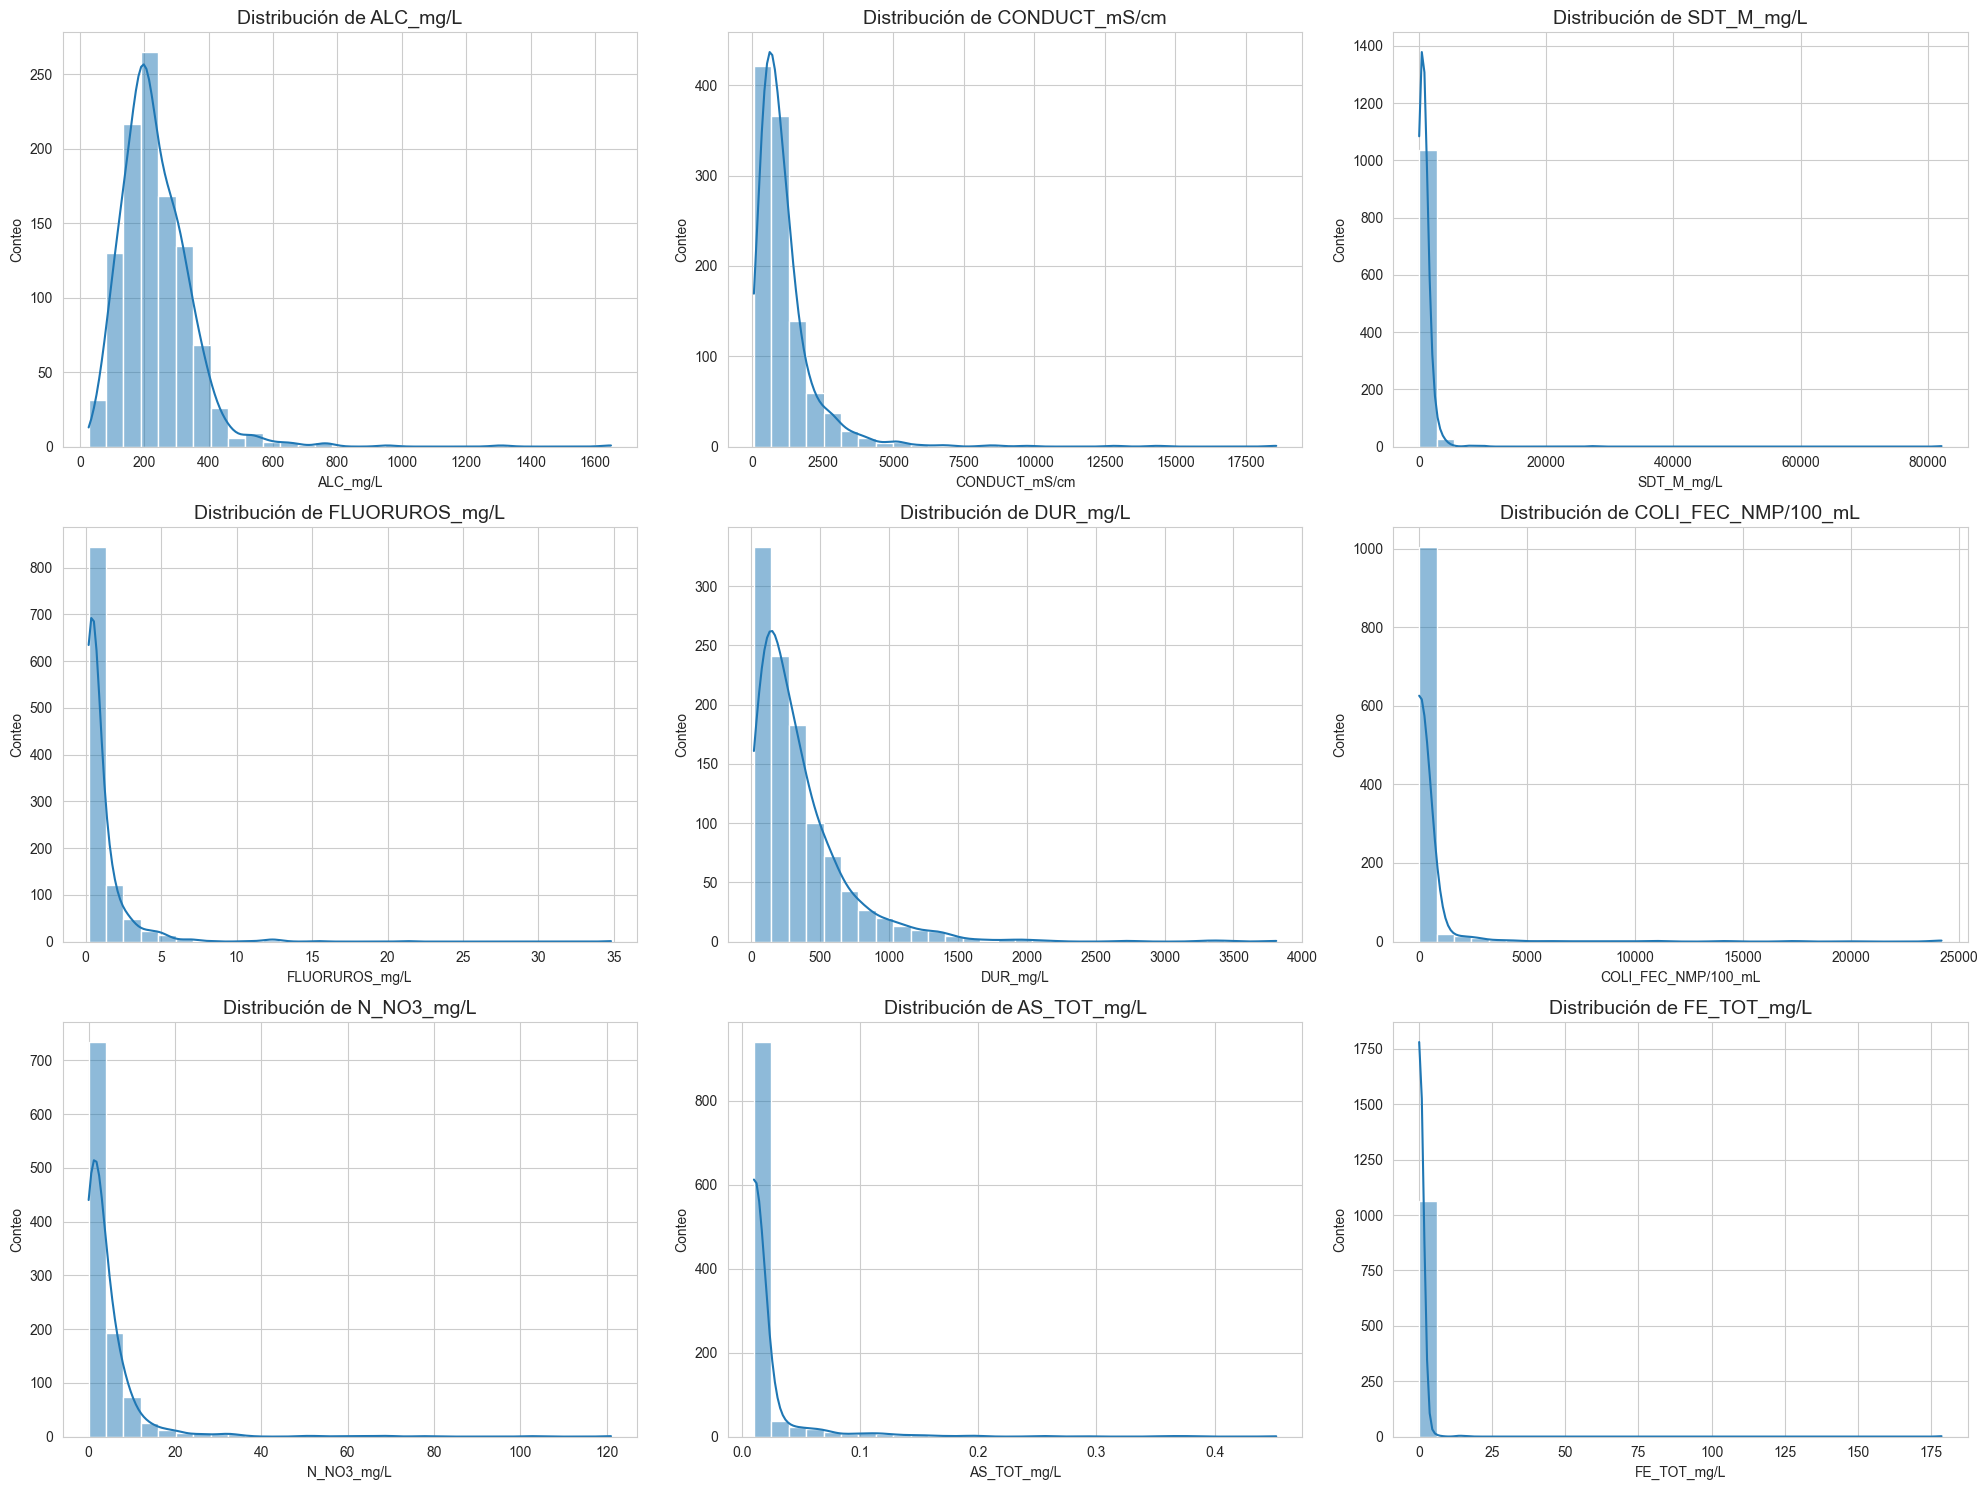


--- Visualizando las Distribuciones de Variables Categóricas Clave ---


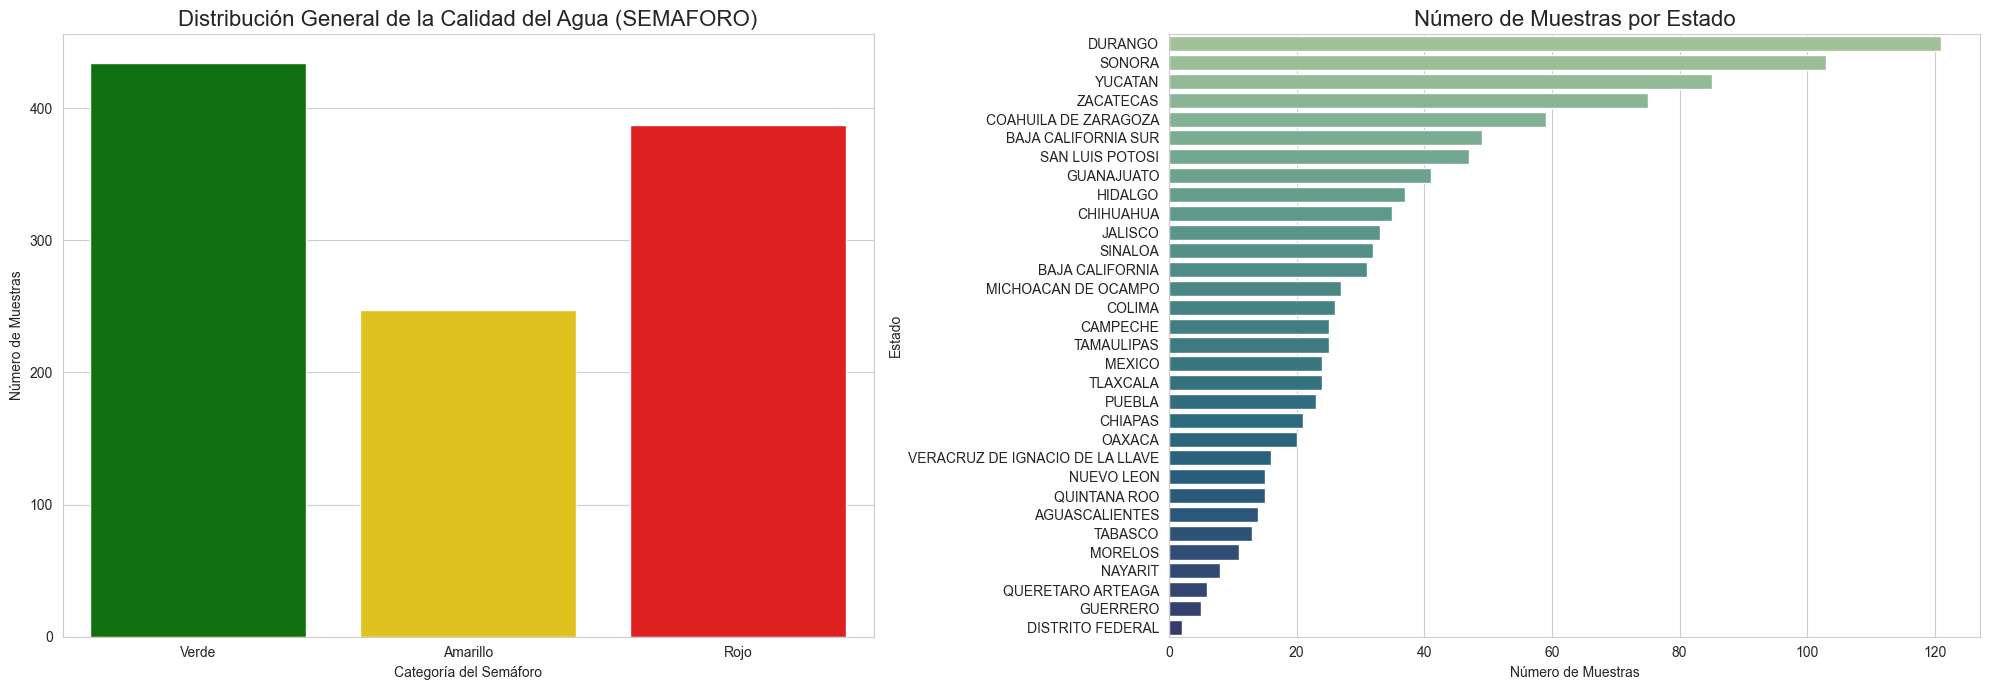

In [14]:
# --- Sección 4.1: Análisis Univariado (Variables Individuales) ---

if 'df_cleaned' in locals() and df_cleaned is not None:
    # --- Distribuciones de Variables Numéricas Clave ---
    print("--- Visualizando las Distribuciones de Variables Numéricas Clave ---")
    fig, axes = plt.subplots(3, 3, figsize=(20, 15))
    cols_to_plot = ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
                    'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'FE_TOT_mg/L']

    for i, col in enumerate(cols_to_plot):
        if col in df_cleaned.columns:
            ax = axes.flatten()[i]
            sns.histplot(df_cleaned[col], kde=True, ax=ax, bins=30)
            ax.set_title(f'Distribución de {col}', fontsize=14)
            ax.set_xlabel(col) # Añadir etiqueta X para claridad
            ax.set_ylabel('Conteo') # Añadir etiqueta Y para claridad
    plt.tight_layout()
    plt.show()

    # --- Distribuciones de Variables Categóricas Clave ---
    print("\n--- Visualizando las Distribuciones de Variables Categóricas Clave ---")
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # Gráfico 1: Distribución del SEMAFORO
    color_map = {'Verde': 'green', 'Amarillo': 'gold', 'Rojo': 'red'}
    sns.countplot(x='SEMAFORO', data=df_cleaned, order=['Verde', 'Amarillo', 'Rojo'], palette=color_map, ax=axes[0])
    axes[0].set_title('Distribución General de la Calidad del Agua (SEMAFORO)', fontsize=16)
    axes[0].set_xlabel('Categoría del Semáforo')
    axes[0].set_ylabel('Número de Muestras')

    # Gráfico 2: Número de muestras por Estado
    sns.countplot(y='ESTADO', data=df_cleaned, order=df_cleaned['ESTADO'].value_counts().index, palette='crest', ax=axes[1])
    axes[1].set_title('Número de Muestras por Estado', fontsize=16)
    axes[1].set_xlabel('Número de Muestras')
    axes[1].set_ylabel('Estado')

    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

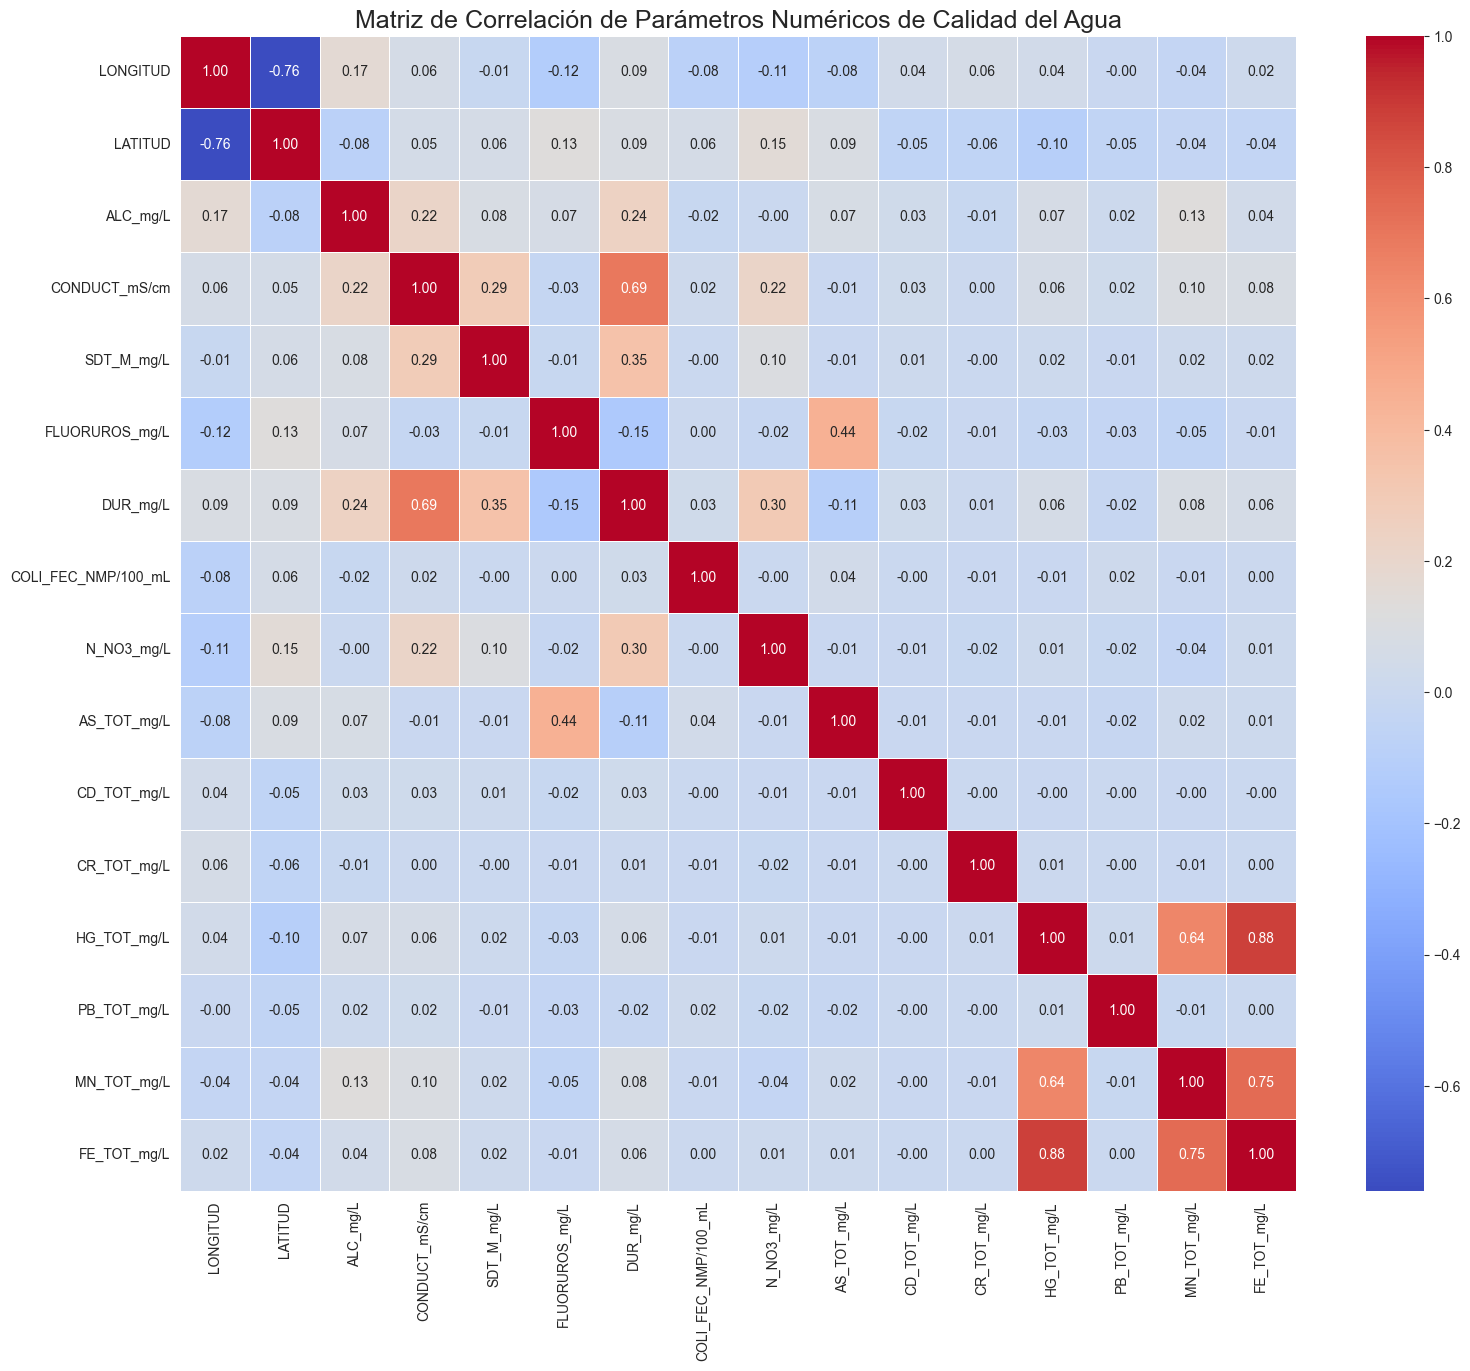

In [15]:
# --- Sección 4.2: Análisis Bivariado (Correlación entre Variables) ---

if 'df_cleaned' in locals() and df_cleaned is not None:
    # Definir nuevamente la lista de columnas numéricas para la matriz de correlación
    numerical_cols = [
        'LONGITUD', 'LATITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L',
        'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
        'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L',
        'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L'
    ]

    # Calcular la matriz de correlación de Pearson
    correlation_matrix = df_cleaned[numerical_cols].corr()

    # Graficar el mapa de calor (heatmap)
    plt.figure(figsize=(18, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Matriz de Correlación de Parámetros Numéricos de Calidad del Agua', fontsize=18)
    plt.show()
else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

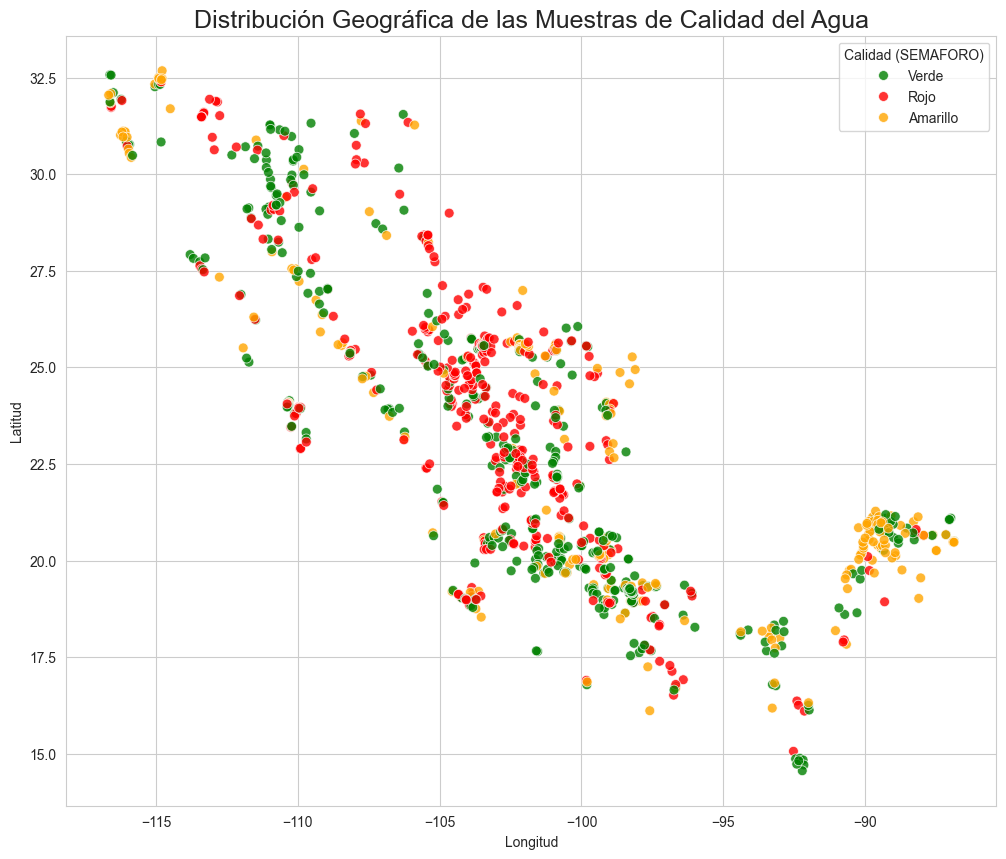

In [16]:
# --- Sección 4.3: Análisis Geoespacial ---

if 'df_cleaned' in locals() and df_cleaned is not None:
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x='LONGITUD',
        y='LATITUD',
        hue='SEMAFORO',
        palette={'Verde': 'green', 'Amarillo': 'orange', 'Rojo': 'red'},
        data=df_cleaned,
        alpha=0.8,
        s=50  # Tamaño de los puntos
    )
    plt.title('Distribución Geográfica de las Muestras de Calidad del Agua', fontsize=18)
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.legend(title='Calidad (SEMAFORO)')
    plt.show()
else:
    print("El DataFrame 'df_cleaned' no fue encontrado. Asegúrate de que los pasos anteriores se ejecutaron correctamente.")

In [17]:
# --- Exportación de Datos Limpios ---

if 'df_cleaned' in locals() and df_cleaned is not None:
  # Definir la ruta del archivo de salida en la carpeta 'datos'
  output_file_path = 'datos/df_cleaned.csv'

  try:
    # Exportar el DataFrame a un archivo CSV, sin incluir el índice del DataFrame
    df_cleaned.to_csv(output_file_path, index=False, encoding='utf-8')
    print(f"El DataFrame 'df_cleaned' se ha exportado exitosamente a: '{output_file_path}'")
  except Exception as e:
    print(f"Ocurrió un error al exportar el archivo: {e}")
else:
  print("El DataFrame 'df_cleaned' no fue encontrado. No se puede realizar la exportación.")

El DataFrame 'df_cleaned' se ha exportado exitosamente a: 'datos/df_cleaned.csv'
